In [4]:
import pandas as pd

path = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
mpg_data = pd.read_csv(path, delim_whitespace=True, header=None,
                      names=['mpg', 'cylinders', 'displacement', 'horsepower',
                            'weight', 'acceleration', 'model_year', 'origin', 'name'],
                      na_values='?')

In [10]:
print(mpg_data)

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0  3504.0          12.0   
1    15.0          8         350.0       165.0  3693.0          11.5   
2    18.0          8         318.0       150.0  3436.0          11.0   
3    16.0          8         304.0       150.0  3433.0          12.0   
4    17.0          8         302.0       140.0  3449.0          10.5   
5    15.0          8         429.0       198.0  4341.0          10.0   
6    14.0          8         454.0       220.0  4354.0           9.0   
7    14.0          8         440.0       215.0  4312.0           8.5   
8    14.0          8         455.0       225.0  4425.0          10.0   
9    15.0          8         390.0       190.0  3850.0           8.5   
10   15.0          8         383.0       170.0  3563.0          10.0   
11   14.0          8         340.0       160.0  3609.0           8.0   
12   15.0          8         400.0       150.0  3761.0          

In [7]:
mpg_data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [8]:
mpg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null float64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
name            398 non-null object
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [19]:
# Check if there is any missing value
%timeit pd.isnull(mpg_data).values.any()

593 µs ± 43.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [20]:
# Check if there is any missing value
mpg_data.isnull().values.any()

True

In [13]:
mpg_data.mpg.corr(mpg_data.weight)

-0.8317409332443354

In [14]:
mpg_data.drop(['model_year', 'origin'], axis=1).corr(method='spearman')

,mpg,cylinders,displacement,horsepower,weight,acceleration
mpg,1.000000,-0.821864,-0.855692,-0.853616,-0.874947,0.438677
cylinders,-0.821864,1.000000,0.911876,0.816188,0.873314,-0.474189
displacement,-0.855692,0.911876,1.000000,0.876171,0.945986,-0.496512
horsepower,-0.853616,0.816188,0.876171,1.000000,0.878819,-0.658142
weight,-0.874947,0.873314,0.945986,0.878819,1.000000,-0.404550
acceleration,0.438677,-0.474189,-0.496512,-0.658142,-0.404550,1.000000


In [31]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

In [24]:
mpg_data.drop(['model_year', 'origin'], axis=1).corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,mpg,cylinders,displacement,horsepower,weight,acceleration
mpg,1.0,-0.78,-0.8,-0.78,-0.83,0.42
cylinders,-0.78,1.0,0.95,0.84,0.9,-0.51
displacement,-0.8,0.95,1.0,0.9,0.93,-0.54
horsepower,-0.78,0.84,0.9,1.0,0.86,-0.69
weight,-0.83,0.9,0.93,0.86,1.0,-0.42
acceleration,0.42,-0.51,-0.54,-0.69,-0.42,1.0


In [26]:
%matplotlib inline

In [27]:
import seaborn as sns

To reset the seaborn style

`sns.set()`

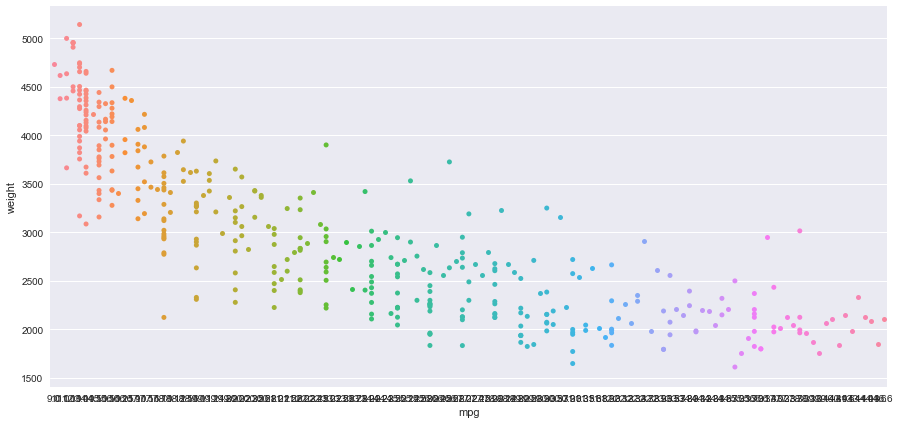

In [50]:
f, ax = plt.subplots(figsize=(15,7))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
sns.stripplot(x='mpg', y='weight', data=mpg_data, ax=ax)